In [1]:
from IPython.display import clear_output, display; import time; import dolfin.common.plotting as fenicsplot 
import time

import os, sys, shutil
from fenics import *


from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import dolfin as dl


In [2]:
mesh = dl.refine(UnitSquareMesh(30, 30))
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
tol = 1E-14
u_D = Expression('0', degree=2)
def boundary_S(x):
    return  near(x[1], 0.5, tol) and (x[0] > 0.5)

bc_S = DirichletBC(V, u_D, boundary_S)

def boundary_L(x):
    return  near(x[0], 0.0, tol) 

bc_L = DirichletBC(V, u_D, boundary_L)

def boundary_R(x):
    return near(x[0], 1.0, tol) 

bc_R = DirichletBC(V, u_D, boundary_R)

def boundary_B(x):
    return  near(x[1], 0.0, tol) 

bc_B = DirichletBC(V, u_D, boundary_B)

def boundary_T(x):
    return  near(x[1], 1.0, tol) 

bc_T = DirichletBC(V, u_D, boundary_T)

bcs = [bc_S, bc_L, bc_R, bc_B, bc_T]

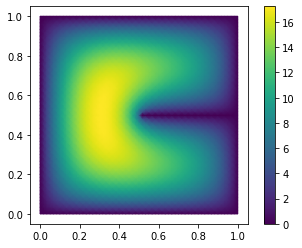

In [4]:
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(400.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bcs)

# Plot solution and mesh
c=plot(u,mode='color')
plt.colorbar(c)
plt.show()

In [8]:
V.dim()

3721

In [5]:
mesh_new = dl.refine(UnitSquareMesh(30, 30))
coordinates = mesh_new.coordinates()
np.random.shuffle(coordinates)

solution=np.zeros(len(coordinates))
for i in range(len(coordinates)):
  solution[i]=u(coordinates[i])+0.001*np.random.normal()

In [10]:
len(coordinates)

10201

0.2169081330851632

In [71]:
coordinates

array([[0.5, 0. ],
       [1. , 1. ],
       [1. , 0.5],
       [1. , 0. ],
       [0. , 0.5],
       [0. , 0. ],
       [0.5, 0.5],
       [0.5, 1. ],
       [0. , 1. ]])

In [6]:
 np.savetxt('input.txt',coordinates)

In [7]:
 np.savetxt('output.txt',solution)